In [1]:
#programmer name : Parth Nirmal
#college : Keystone school of engg.
#class : TE(B)
#Roll no : 12

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("MoviesOnStreamingPlatforms.csv")

In [4]:
df

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9510,9510,9511,Most Wanted Sharks,2020,NaN,14/100,0,0,0,1,0
9511,9511,9512,Doc McStuffins: The Doc Is In,2020,NaN,13/100,0,0,0,1,0
9512,9512,9513,Ultimate Viking Sword,2019,NaN,13/100,0,0,0,1,0
9513,9513,9514,Hunt for the Abominable Snowman,2011,NaN,10/100,0,0,0,1,0


In [5]:
df['Age'].value_counts()

Age
18+    2276
7+     1090
13+     998
all     698
16+     276
Name: count, dtype: int64

In [6]:
df.dtypes

Unnamed: 0          int64
ID                  int64
Title              object
Year                int64
Age                object
Rotten Tomatoes    object
Netflix             int64
Hulu                int64
Prime Video         int64
Disney+             int64
Type                int64
dtype: object

### Question 1 : Counting total number adult movies

In [7]:
df['Age'].value_counts().get('18+',0)

2276

### Question 2 : Average Rotten Tomatoes rating of movies released in year "2018"

In [8]:
def convert_rt(score):
    if pd.isna(score):
        return None
    if isinstance(score,float):
        return score
    if '/' in score:
        numerator, denominator = score.split('/')
        return float(numerator) / float(denominator)
    elif '%' in score:
        return float(score.rstrip('%')) / 100
    else:
        return None
    
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].apply(convert_rt)

avg = df[df['Year'] == 2018]['Rotten Tomatoes'].mean()
avg

    

0.5283474576271187

### Question 3 : Saving the DataFrame in Amazon.csv file

In [9]:
#grouping functions
gr = df.groupby('Prime Video')
gr.groups

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], 1: [116, 155, 158, 184, 185, 310, 326, 327, 334, 359, 380, 400, 407, 410, 412, 447, 456, 468, 501, 503, 528, 534, 536, 540, 558, 566, 582, 584, 603, 605, 625, 630, 646, 666, 677, 763, 796, 813, 821, 823, 829, 893, 897, 902, 934, 963, 1065, 1080, 1098, 1115, 1215, 1240, 1252, 1277, 1327, 1330, 1337, 1343, 1379, 1380, 1414, 1429, 1465, 1481, 1497, 1509, 1518, 1527, 1637, 1647, 1708, 1711, 1752, 1753, 1791, 1797, 1816, 1830, 1852, 1853, 1975, 2075, 2093, 2168, 2170, 2172, 2202, 2234, 2243, 2246, 2333, 2348, 2363, 2411, 2451, 2479, 2707, 2875, 2896, 2916, ...]}

In [10]:
df1 = gr.get_group(1).reset_index()

In [11]:
df1

,index,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,116,116,117,The Terminal,2004,13+,0.82,1,0,1,0,0
1,155,155,156,Seven Pounds,2008,13+,0.80,1,0,1,0,0
2,158,158,159,Les Misérables,2012,13+,0.80,1,0,1,0,0
3,184,184,185,Underworld,2003,18+,0.79,1,1,1,0,0
4,185,185,186,The Ring,2002,13+,0.79,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4108,8610,8610,8611,Arthur and the Haunted Tree House,2017,NaN,0.13,0,0,1,0,0
4109,8611,8611,8612,Rollin: The Fall of the Auto Industry and the ...,2016,NaN,0.13,0,0,1,0,0
4110,8612,8612,8613,The Fairies: Fairy Beach,2007,all,0.12,0,0,1,0,0
4111,8613,8613,8614,5K1-States Evidence,2018,NaN,0.12,0,0,1,0,0


In [12]:
df1.to_csv("Amazon.csv", index = False)

### Question 4 : Movies with no age limit

In [13]:
no_age_limit = df[df['Age'].isna()]['Title']

In [14]:
no_age_limit

35                            On Body and Soul
40                                  Special 26
57                   The Distinguished Citizen
65                               Chasing Coral
88                 What Happened, Miss Simone?
                         ...                  
9509    Built for Mars: The Perseverance Rover
9510                        Most Wanted Sharks
9511             Doc McStuffins: The Doc Is In
9512                     Ultimate Viking Sword
9513           Hunt for the Abominable Snowman
Name: Title, Length: 4177, dtype: object

### Question 5 : Movies on multiple platform

In [15]:
multiple_platforms = df[(df[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum(axis = 1) > 1)].shape[0]
multiple_platforms

253

### Question 6 : Average Rating of movies released on netflix in year 2010

In [16]:
avg_netflix_rating_2010 = df[(df['Netflix'] == 1) & (df['Year'] == 2010)]['Rotten Tomatoes'].mean()
print(avg_netflix_rating_2010)

0.5874999999999999


### Question 7 : Movies on disney plus for 13+ age

In [17]:
disney_plus = df[(df["Disney+"] == 1) & (df['Age'] == '13+')].reset_index()

disney_plus

,index,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,4203,4203,4204,Teen Spirit,2019,13+,0.60,0,1,0,1,0
1,4863,4863,4864,Pinocchio,2019,13+,0.72,0,0,1,1,0
2,5613,5613,5614,Wind,1992,13+,0.58,0,0,1,1,0
3,8616,8616,8617,Avengers: Endgame,2019,13+,0.90,0,0,0,1,0
4,8617,8617,8618,Avengers: Infinity War,2018,13+,0.90,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65,9479,9479,9480,The Lost City of Machu Picchu,2019,13+,0.38,0,0,0,1,0
66,9484,9484,9485,Wild Portugal,2020,13+,0.37,0,0,0,1,0
67,9488,9488,9489,Shark Attack Investigation: The Paige Winter S...,2020,13+,0.35,0,0,0,1,0
68,9507,9507,9508,Texas Storm Squad,2020,13+,0.14,0,0,0,1,0


### Question 8 : Highest Rated movie in year 1977

In [18]:
highest_rated = df[(df["Year"] == 1977) & (df["Rotten Tomatoes"] > 0.88)]['Title']

highest_rated

8618    Star Wars: A New Hope
Name: Title, dtype: object

### Question 9 : Movies released on hulu in year 2020

In [19]:
hulu_movies = df[(df["Hulu"] == 1) & (df["Year"] == 2020)].reset_index()

hulu_movies

,index,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1674,1674,1675,MOTHER,2020,NaN,0.55,1,1,0,0,0
1,2259,2259,2260,Born to Play,2020,NaN,0.49,1,1,0,0,0
2,3712,3712,3713,Happiest Season,2020,13+,0.83,0,1,0,0,0
3,3718,3718,3719,Big Time Adolescence,2020,18+,0.83,0,1,0,0,0
4,3737,3737,3738,Another Round,2020,18+,0.80,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
111,4662,4662,4663,Naughty Books,2020,NaN,0.42,0,1,0,0,0
112,4678,4678,4679,Carrion,2020,NaN,0.39,0,1,0,0,0
113,4684,4684,4685,A Christmas Hero,2020,NaN,0.39,0,1,0,0,0
114,4698,4698,4699,Michael Smerconish: Things I Wish I Knew Befor...,2020,NaN,0.20,0,1,0,0,0


In [20]:
movies_prime = df[df["Prime Video"] == 1]

movies_prime

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
116,116,117,The Terminal,2004,13+,0.82,1,0,1,0,0
155,155,156,Seven Pounds,2008,13+,0.80,1,0,1,0,0
158,158,159,Les Misérables,2012,13+,0.80,1,0,1,0,0
184,184,185,Underworld,2003,18+,0.79,1,1,1,0,0
185,185,186,The Ring,2002,13+,0.79,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8610,8610,8611,Arthur and the Haunted Tree House,2017,NaN,0.13,0,0,1,0,0
8611,8611,8612,Rollin: The Fall of the Auto Industry and the ...,2016,NaN,0.13,0,0,1,0,0
8612,8612,8613,The Fairies: Fairy Beach,2007,all,0.12,0,0,1,0,0
8613,8613,8614,5K1-States Evidence,2018,NaN,0.12,0,0,1,0,0


### Question 10 : Sorting movie names by released year

In [21]:
prime_movies_names = df[df['Prime Video'] == 1][['Title', 'Year']].sort_values(by = 'Year')

prime_movies_names

,Title,Year
7043,The Patchwork Girl of Oz,1914
6151,The Cheat,1915
7208,"Fanchon, the Cricket",1915
7314,Joan the Woman,1916
5281,Broken Blossoms,1919
...,...,...
6893,These Streets We Haunt,2021
4737,The Tomorrow War,2021
6698,The Lift,2021
6887,My Brother's Keeper,2021


### Question 11 : Movies with name "Tiger" in it

In [22]:
tiger = df['Title'].str.contains("tiger")

tiger_name = df[tiger]

tiger_name

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
7631,7631,7632,Rudy Ruettiger: The Walk On,2017,NaN,0.42,0,0,1,0,0


### Question 12 : Plotting the count share of all movies by platforms

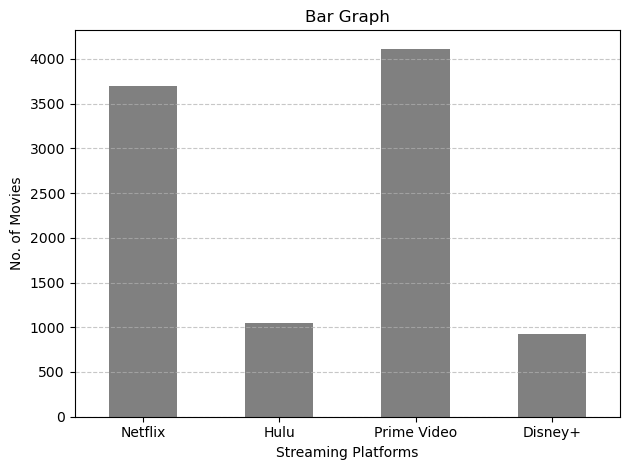

In [42]:
platfrom_counts = df.iloc[:, 6:10].sum()
platfrom_counts.plot(kind = 'bar' , color = 'grey')
plt.title('Bar Graph')
plt.xlabel('Streaming Platforms')
plt.ylabel('No. of Movies')
plt.xticks(rotation=0)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.tight_layout()
plt.show()

### Question 13 : Highest rated movie on Hulu Platform

In [56]:

highest_rated_hulu = df[(df["Rotten Tomatoes"] > 0.97)]['Title']

highest_rated_hulu

0    The Irishman
Name: Title, dtype: object

### Question 14 : Counting the total no. of movies released on netflix yearwise 


In [66]:
netflix_movies_names = df[df['Netflix'] == 1]

netflix_movies_year = netflix_movies_names.groupby('Year')

Netflix_movies_count = netflix_movies_year.size()

Netflix_movies_count

Year
1954      2
1956      1
1958      1
1959      1
1960      1
       ... 
2017    449
2018    540
2019    573
2020    478
2021    201
Length: 62, dtype: int64

### Question 15 : Total no. of movies which are 18+ and 13+ on Disney+ platform 

In [113]:
eighteen = df[(df['Disney+'] == 1) & (df['Age'] == "18+")].reset_index()

eighteen

,index,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,4131,4131,4132,The Kid,2019,18+,0.62,0,1,0,1,0
1,7653,7653,7654,The Swap,1979,18+,0.42,0,0,1,1,0
2,8985,8985,8986,Maggie Simpson in The Force Awakens from Its Nap,2021,18+,0.61,0,0,0,1,0


In [114]:
thirteen =  df[(df['Disney+'] == 1) & (df['Age'] == "13+")].reset_index()

thirteen

,index,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,4203,4203,4204,Teen Spirit,2019,13+,0.60,0,1,0,1,0
1,4863,4863,4864,Pinocchio,2019,13+,0.72,0,0,1,1,0
2,5613,5613,5614,Wind,1992,13+,0.58,0,0,1,1,0
3,8616,8616,8617,Avengers: Endgame,2019,13+,0.90,0,0,0,1,0
4,8617,8617,8618,Avengers: Infinity War,2018,13+,0.90,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65,9479,9479,9480,The Lost City of Machu Picchu,2019,13+,0.38,0,0,0,1,0
66,9484,9484,9485,Wild Portugal,2020,13+,0.37,0,0,0,1,0
67,9488,9488,9489,Shark Attack Investigation: The Paige Winter S...,2020,13+,0.35,0,0,0,1,0
68,9507,9507,9508,Texas Storm Squad,2020,13+,0.14,0,0,0,1,0


In [115]:
movie = df[df['Disney+'] == 1]

age = movie.groupby('Age')

count = age.size()

In [116]:
sum = df["Disney+"].sum()
sum

922

In [117]:
categories = ['18+', '13+']

no_of_movies = [count.get("18+", 0), count.get("13+", 0)]

In [119]:
categories, no_of_movies

(['18+', '13+'], [3, 70])

<BarContainer object of 2 artists>

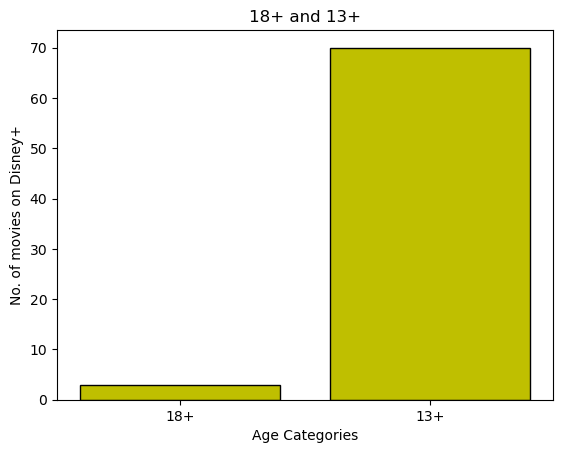

In [118]:
plt.title('18+ and 13+')
plt.xlabel('Age Categories')
plt.ylabel('No. of movies on Disney+')
plt.bar(categories,no_of_movies ,color='y', edgecolor = 'black')